# 西二python 第三轮考核1

题目：
小林有一个朋友沉迷学（mo）习（yu）以致于只能认出0和1这两个数字，所以请你做一个手写数字识别出来救救小林的朋友吧

要求：
1. 使用numpy 
2. 识别率尽可能高
3. 把训练好的模型拿去参加kaggle上的比赛

In [148]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [149]:
train = pd.read_csv("train1.csv")
test = pd.read_csv("test1.csv")

In [150]:
train.shape

(42000, 785)

In [151]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
test.shape

(28000, 784)

In [153]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
numbers = train['label']

In [155]:
numbers.head(10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [156]:
fre = numbers.value_counts()
fre.sort_index(inplace=True)
fre

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

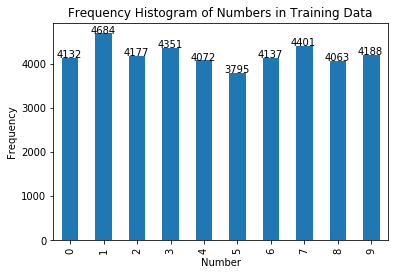

In [157]:
for x, y in enumerate(fre.values):
    plt.text(x-0.4, y, "%s" %y)
    
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number")
plt.ylabel("Frequency")
fre.plot.bar()
plt.show()

In [158]:
train=train.drop('label', axis=1)

In [159]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
def draw():
    for i in range(36):
        plt.subplot(6,6,i+1)
        plt.imshow(train.ix[i].values.reshape(28, 28))
    plt.show()

D:\anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


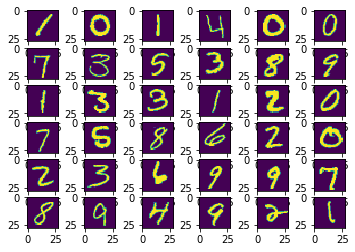

In [161]:
draw()

In [162]:
train = train/255
test = test/255

In [163]:
X_train, X_num, y_train, y_num = train_test_split(train, numbers, test_size = 0.2)

In [164]:
mlp = MLPClassifier()

In [165]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [166]:
y_test_predict=mlp.predict(X_num)
print(y_num)

15377    7
12594    4
30810    1
20371    9
33681    8
472      0
38040    9
6383     6
7595     9
6540     2
3888     7
21327    7
40530    3
13059    5
30270    8
22827    8
33906    7
8332     5
13250    4
33035    0
1821     5
14537    9
11125    7
33330    7
8957     4
40024    3
32261    3
27474    7
40506    6
3880     8
        ..
34206    7
33082    8
78       4
4318     5
33643    8
17600    1
15466    3
25297    7
3653     7
27170    1
18723    8
17919    7
41827    0
24493    0
20279    3
12364    4
32160    1
24650    0
22136    3
17688    8
6490     7
33678    0
15541    2
34535    5
5110     5
7629     8
6004     9
1154     2
36097    2
10521    3
Name: label, Length: 8400, dtype: int64


In [167]:
y_test=y_num.values
print(y_test)

[7 4 1 ..., 2 2 3]


In [168]:
print(y_test_predict)

[7 4 1 ..., 2 2 3]


In [169]:
y_test_predict.shape

(8400,)

In [170]:
test_prediction=mlp.predict(test)

In [171]:
results = pd.Series(test_prediction,name="Label")

In [172]:
image_ids=pd.Series(range(1,28001),name = "ImageId")

In [173]:
My_submission = pd.concat([image_ids,results],axis = 1)
My_submission.to_csv("submission.csv",index=False)

In [183]:
My_submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [175]:
errors=np.nonzero(y_test-y_test_predict)
print(errors)

(array([  13,   26,   37,   50,   74,   86,   90,  207,  220,  255,  303,
        335,  366,  499,  528,  539,  562,  579,  642,  651,  656,  669,
        705,  853,  942, 1047, 1087, 1095, 1131, 1195, 1212, 1279, 1281,
       1324, 1355, 1423, 1443, 1473, 1547, 1632, 1671, 1778, 1779, 1811,
       1831, 1839, 1882, 1898, 1909, 2002, 2086, 2137, 2144, 2162, 2169,
       2257, 2311, 2315, 2325, 2339, 2393, 2441, 2506, 2529, 2544, 2559,
       2584, 2731, 2744, 2775, 2778, 2791, 2821, 2892, 2905, 2917, 2947,
       2971, 2983, 2986, 3000, 3035, 3112, 3121, 3215, 3247, 3281, 3312,
       3347, 3419, 3469, 3482, 3501, 3518, 3523, 3554, 3635, 3650, 3719,
       3726, 3736, 3777, 3791, 3829, 3940, 3965, 3969, 4072, 4080, 4119,
       4124, 4133, 4135, 4161, 4195, 4232, 4250, 4270, 4421, 4523, 4585,
       4586, 4594, 4626, 4636, 4643, 4646, 4713, 4768, 4826, 4837, 4842,
       4870, 5014, 5122, 5128, 5163, 5188, 5192, 5255, 5297, 5391, 5497,
       5505, 5599, 5614, 5637, 5644, 5681, 5713, 5

In [176]:
p_1 = 1-len(errors[0])/len(y_test)
print("accuracy：",p_1)

accuracy： 0.973452380952381


In [177]:
p_2 = precision_score(y_test,y_test_predict,average=None) 
print("accuracy：",p_2)

accuracy： [ 0.98655257  0.98442368  0.95906433  0.96933962  0.98285714  0.97583893
  0.97674419  0.9698324   0.96903226  0.9600939 ]


In [178]:
print(mlp, metrics.classification_report(y_num, y_test_predict))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)              precision    recall  f1-score   support

          0       0.99      0.98      0.98       821
          1       0.98      0.99      0.99       957
          2       0.96      0.97      0.96       848
          3       0.97      0.96      0.96       860
          4       0.98      0.97      0.98       889
          5       0.98      0.96      0.97       754
          6       0.98      0.99      0.98       767
          7       0.97      0.98      0.97       886
          8       0.97      0.97      0.97       778
          9       0.96      0.97   

In [179]:
print('accurcy :',metrics.accuracy_score(y_num, y_test_predict))

accurcy : 0.973452380952


In [180]:
p_3 = precision_score(y_test,y_test_predict,average="micro") 
print("accuracy：",p_3)

accuracy： 0.973452380952
